In [1]:
%matplotlib inline

import os
import warnings
import sys
import time
from typing import Any
import time
import copy
import random
from dataclasses import dataclass

import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib
from IPython.display import clear_output

def custom_breakpointhook(*args, **kwargs):
    from IPython.core.debugger import set_trace; set_trace(*args, **kwargs)
sys.breakpointhook = custom_breakpointhook


# def add(path):
#     if path not in sys.path:
#         sys.path.append(path)
# add("/Users/dsweet2/Jupyter/")
# add("/Users/dsweet2/Projects/bbo/")


import analysis.data_sets as ads
import analysis.plotting as ap
%load_ext autoreload
%autoreload 1
%aimport analysis.data_sets
%aimport analysis.plotting

/home/juju/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path

['/home/juju/projects/bbo',
 '/home/juju/miniconda3/envs/bbo/lib/python310.zip',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/lib-dynload',
 '',
 '/home/juju/.local/lib/python3.10/site-packages',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/site-packages']

In [3]:
# NB: beta=0, so even though these use "msvar", it's really just "mvar"

In [4]:
def data_locator(exp_tag, problem_name, optimizer_name):
    return f"results/{exp_tag}/{problem_name}/{optimizer_name}"

In [5]:
def plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg=-1):
    ap.plot_agg_all(ax, data_locator, exp_name, optimizers=optimizers, sort=True, i_agg=i_agg)
    ax.set_title(f"num_arms = {num_arms}  num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")

# Fig Compare Initialization

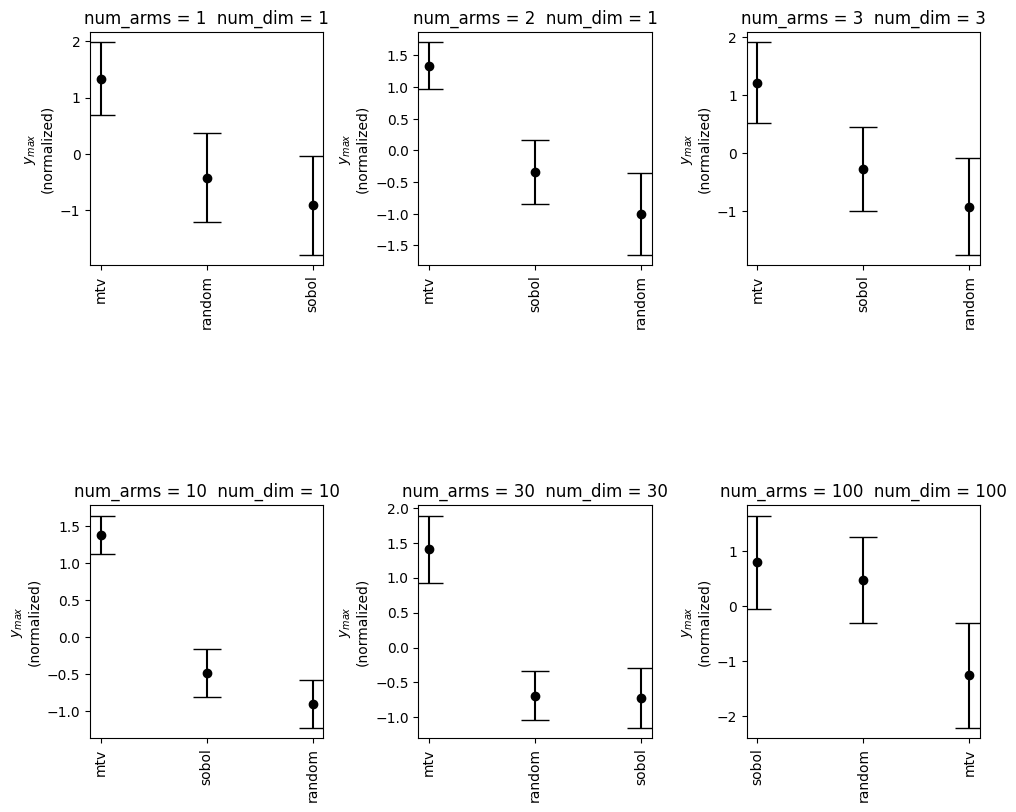

In [6]:
def plot_compare_init(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

fig, axs = ap.subplots(2, 3, figsize=10)
plot_compare_init(axs[0], "exp_2_plots/plot_1d_1arm", num_arms=1, num_dim=1)
plot_compare_init(axs[1], "exp_2_plots/plot_2d_2arm", num_arms=2, num_dim=1)
plot_compare_init(axs[2], "exp_2_plots/plot_3d_3arm", num_arms=3, num_dim=3)
plot_compare_init(axs[3], "exp_2_plots/plot_10d_10arm", num_arms=10, num_dim=10)
plot_compare_init(axs[4], "exp_2_plots/plot_30d_30arm", num_arms=30, num_dim=30)
plot_compare_init(axs[5], "exp_2_plots/plot_100d_100arm", num_arms=100, num_dim=100)
ap.tight(axs)
plt.savefig("figures/compare_init.png")
plt.show()

In [ ]:
def plot_compare_init(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

fig, axs = ap.subplots(2, 3, figsize=10)
plot_compare_init(axs[0], "exp_2_plots/plot_1d_1arm", num_arms=1, num_dim=1)
plot_compare_init(axs[1], "exp_2_plots/plot_2d_2arm", num_arms=2, num_dim=1)
plot_compare_init(axs[2], "exp_2_plots/plot_3d_3arm", num_arms=3, num_dim=3)
plot_compare_init(axs[3], "exp_2_plots/plot_10d_10arm", num_arms=10, num_dim=10)
plot_compare_init(axs[4], "exp_2_plots/plot_30d_30arm", num_arms=30, num_dim=30)
plot_compare_init(axs[5], "exp_2_plots/plot_100d_100arm", num_arms=100, num_dim=100)
ap.tight(axs)
plt.savefig("figures/compare_init.png")
plt.show()

# Fig Compare

In [6]:
def plot_compare(ax, exp_name, num_arms, num_dim, i_agg=-1):
    optimizers = [
        'random',
        "sobol",
        "sr",
        'ei',
        'ucb',
        'dpp',
        'mtv',
        'gibbon',
        'mtv_then_ucb',
        'mtv_then_ei',
        'mtv_then_gibbon',
        'mtv_then_sr',
        'mtv_then_dpp',
        'mtv_musg',
        'mtv_best_obs',
        'mtv_best_obs_musg',
    ]
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg)

Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/random [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/random'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sobol [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sobol'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sr [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sr'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ei [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ei'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ucb [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000

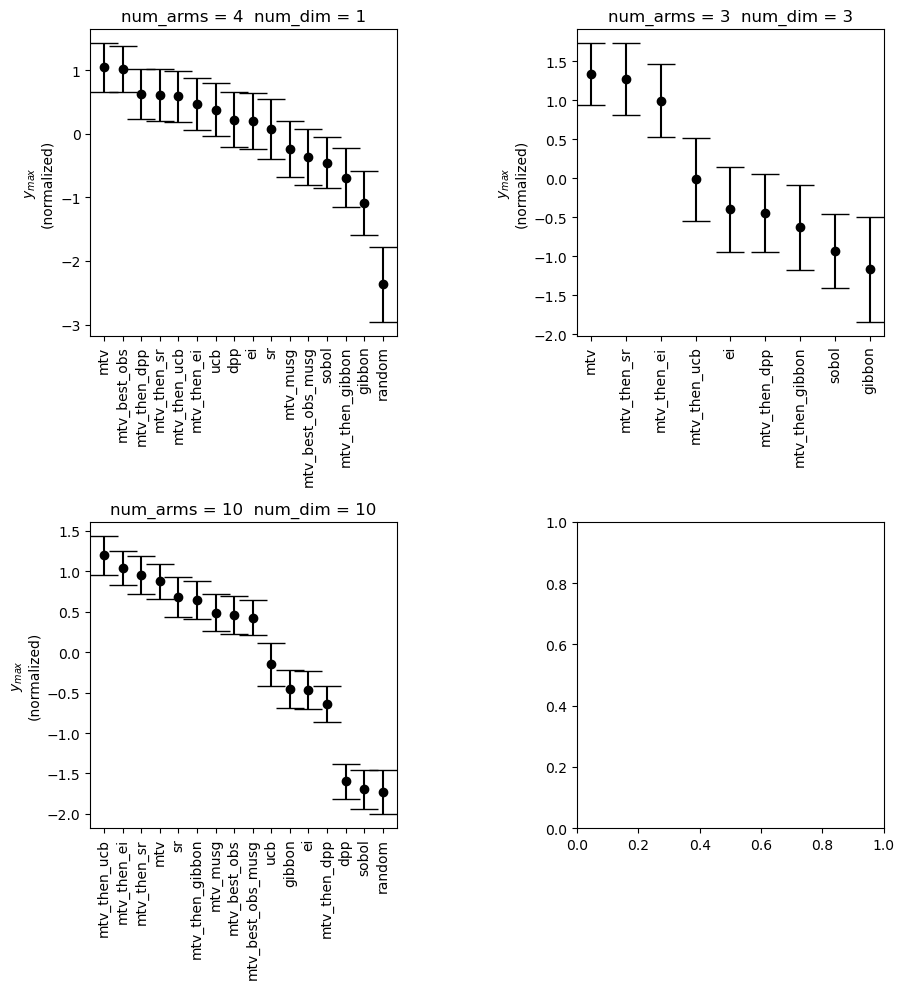

In [12]:
i_agg = -1
axs = ap.subplots(2, 2, figsize=10)
plot_compare(axs[0], "exp_2_mtv_1d_b", num_arms=4, num_dim=1, i_agg=i_agg)
plot_compare(axs[1], "exp_2_mtv_3d_b", num_arms=3, num_dim=3, i_agg=i_agg)
plot_compare(axs[2], "exp_2_mtv_10d_b", num_arms=10, num_dim=10, i_agg=i_agg)
# plot_compare(axs[2], "exp_2_mtv_30d_b", num_arms=30, num_dim=30, i_agg=i_agg)
ap.tight(axs)
plt.show()

## Fig Ablate

In [23]:
def plot_ablate(ax, exp_name, num_arms, num_dim, i_agg):
# TODO: add "use random batch_initial_conditions"

    optimizers = [
        "random",
        'ei_c',
        'ucb_c',
        'mtv_no-opt',
        'mtv_no-ic',
        'mtv_no-pmax',
        'mtv',
#         'mtv_sr',
        'mtv_ei',
        'mtv_ucb',
        'mtv_then_ei',
        'mtv_then_ucb',
        "mtv_no-len-corr",
        'dpp_c'
    ]
    
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg)

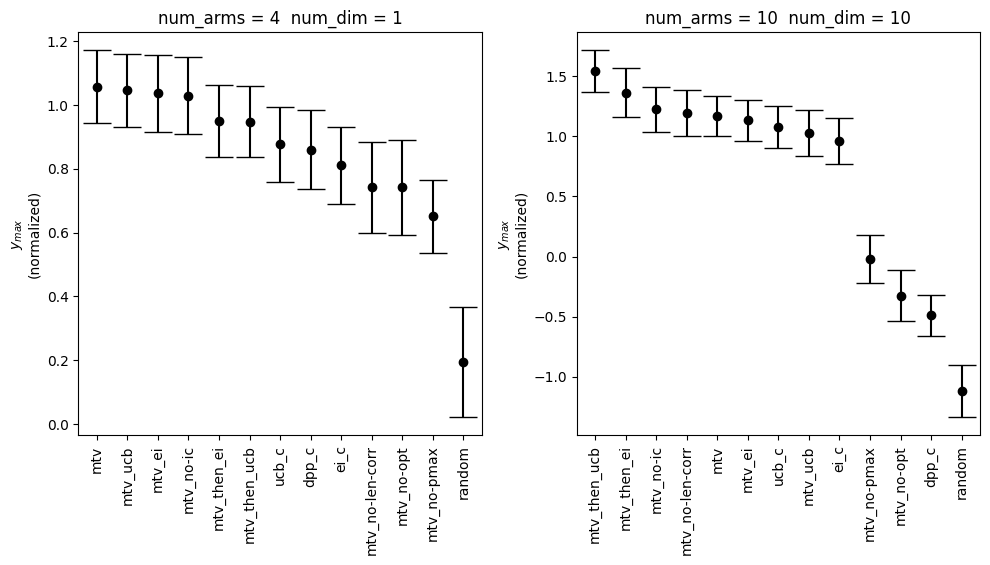

In [24]:
i_agg=-1
axs = ap.subplots(1, 2, figsize=10)
plot_ablate(axs[0], "exp_2_mtv_1d", num_arms=4, num_dim=1, i_agg=i_agg)
plot_ablate(axs[1], "exp_2_mtv_10d", num_arms=10, num_dim=10, i_agg=i_agg)
ap.tight(axs)
plt.show()

In [120]:
optimizers = [
        'ei_c',
        'ucb_c',
        'mtv_no-opt',
        'mtv_no-ic',
        'mtv_no-pmax',
        'mtv',
        'mtv_ei',
        'mtv_ucb',
    ]
exp_tag = "exp_2_mtv_10d"
problems = ads.problems_in(exp_tag)

In [127]:
ads.load_rank_summary(exp_tag, "f:sphere-10d", optimizers, data_locator)

{'ei_c': (4.08, 1.4538225476309004),
 'ucb_c': (5.84, 1.671645895517349),
 'mtv_no-opt': (1.815, 1.1697328754891008),
 'mtv_no-ic': (5.77, 1.7196220514985259),
 'mtv_no-pmax': (1.91, 1.2090905673273615),
 'mtv': (5.58, 1.898315042346765),
 'mtv_ei': (5.425, 1.8115946014492315),
 'mtv_ucb': (5.58, 1.9296631830451658)}

{'ei_c': (4.63708494731605, 2.407093966807223),
 'ucb_c': (5.161585334483052, 3.0116274336337194),
 'mtv_no-opt': (1.8335476592538296, 0.4168963351702566),
 'mtv_no-ic': (5.383004071827596, 3.2349371932671778),
 'mtv_no-pmax': (2.4375937720611387, 0.6882653752417538),
 'mtv': (5.281212919542356, 3.1203958927410254),
 'mtv_ei': (5.0366871710160535, 2.8433898291562105),
 'mtv_ucb': (5.053383559828037, 2.849247206766517)}

mtv_50 beat mtv

You can find the results in results_old_3. "mtv" no refers to what was mtv_50.

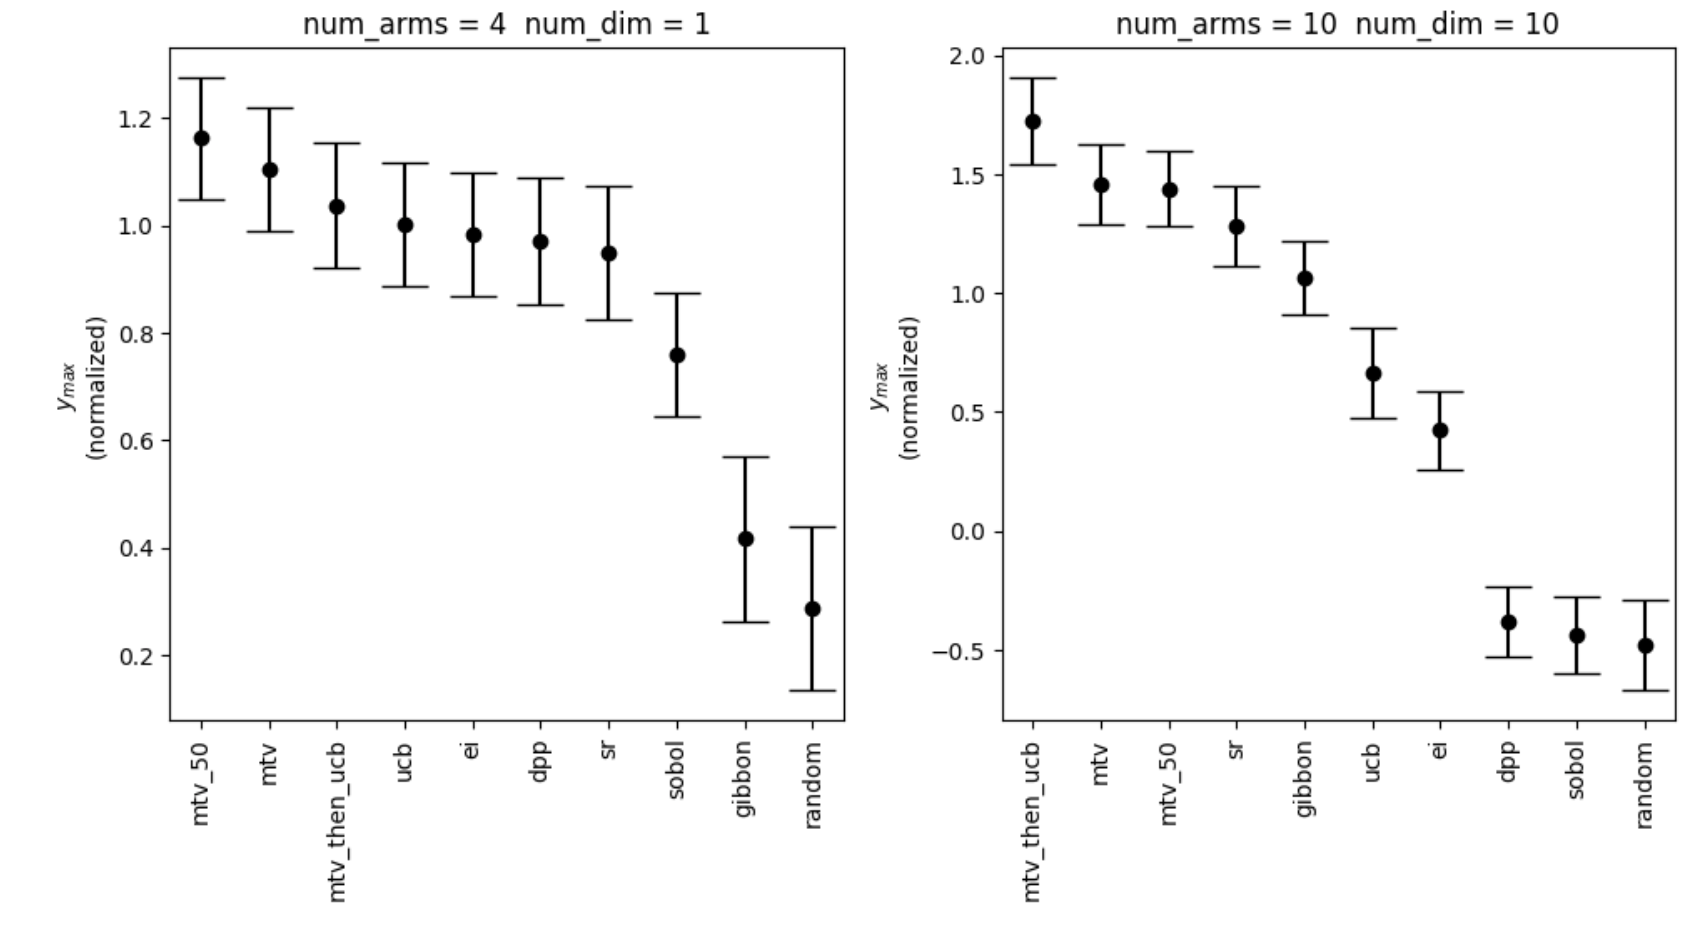